In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import json
from statistics import variance

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rcParams["figure.figsize"] = (20,10)

def plot_perf(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            n = float(line.split()[1])
            k = float(line.split()[2])
            time = float(line.split()[3])
            cost = float(line.split()[4])
            x.append(cost/(m*n + n*k + m*k))
            y.append((cost/time)*1e-9)
            

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("F/B")
    plt.ylabel("GF/s")
    plt.plot(x,y,'.',color='grey')
    
def plot_perf_square(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            n = float(line.split()[1])
            k = float(line.split()[2])
            if m==n==k:
                time = float(line.split()[3])
                cost = float(line.split()[4])
                x.append(m)
                y.append((cost/time)*1e-9)
            

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("size")
    plt.ylabel("GF/s")
    plt.plot(x,y,'.',color='grey')

In [3]:
def get_data(filename):
    data = {}
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            x = line.split()[0] + " " + line.split()[1] + " " + line.split()[2]
            time = float(line.split()[3])
            cost = float(line.split()[4])
            y = (cost/time)*1e-9
            try:
                data[x].append(y)
            except KeyError:
                data[x] = []
                data[x].append(y)

    for k,v in data.items():
        v.sort()
        
    return data

In [57]:
filename1 = "sample_size_estimation/data/gemm_mnk_random2.txt"
data1 = get_data(filename1)

In [41]:
filename2 = "sample_size_estimation/data/gemm_mnk_random_square.txt"
data2 = get_data(filename2)

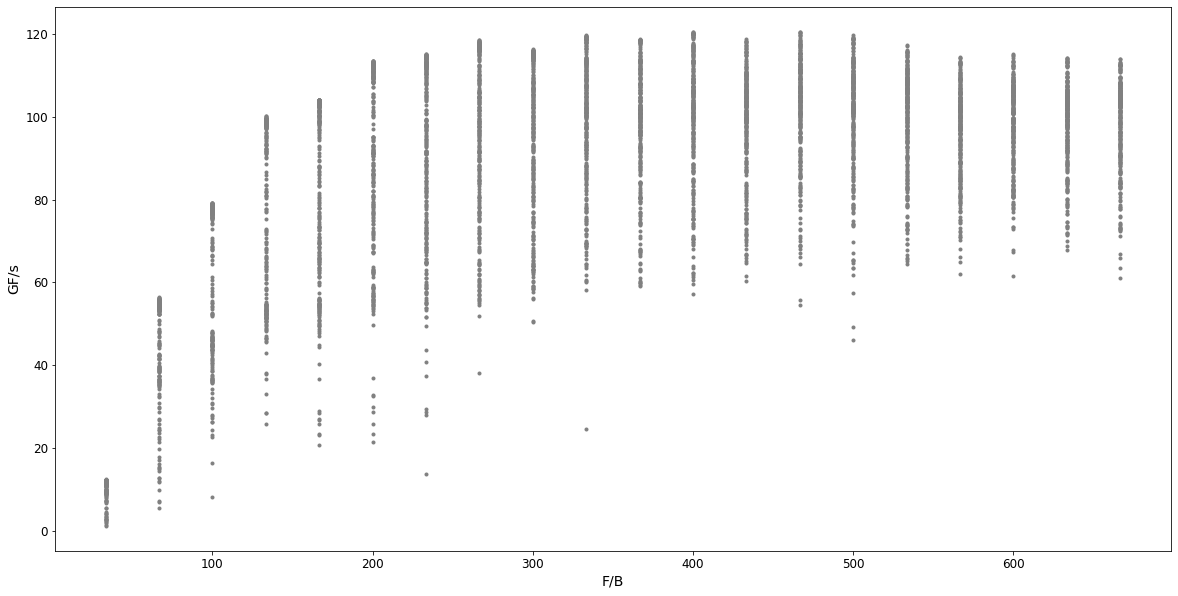

In [58]:
plot_perf(filename2)
plt.show()

In [49]:
def get_plot(data):
    y = []
    x = []
    for k,v in data.items():
        m,n,k = map(float,k.split())
        if m==n==k:
            #y.append(np.var(v))
            y.append(variance(v))
            x.append(m)
    zipped = sorted(zip(x,y), key=lambda t: t[0])
    x = np.array(zipped)[:,0]
    y = np.array(zipped)[:,1]
    return (x,y)

In [50]:
x1,y1 = get_plot(data1)
x2,y2 = get_plot(data2)

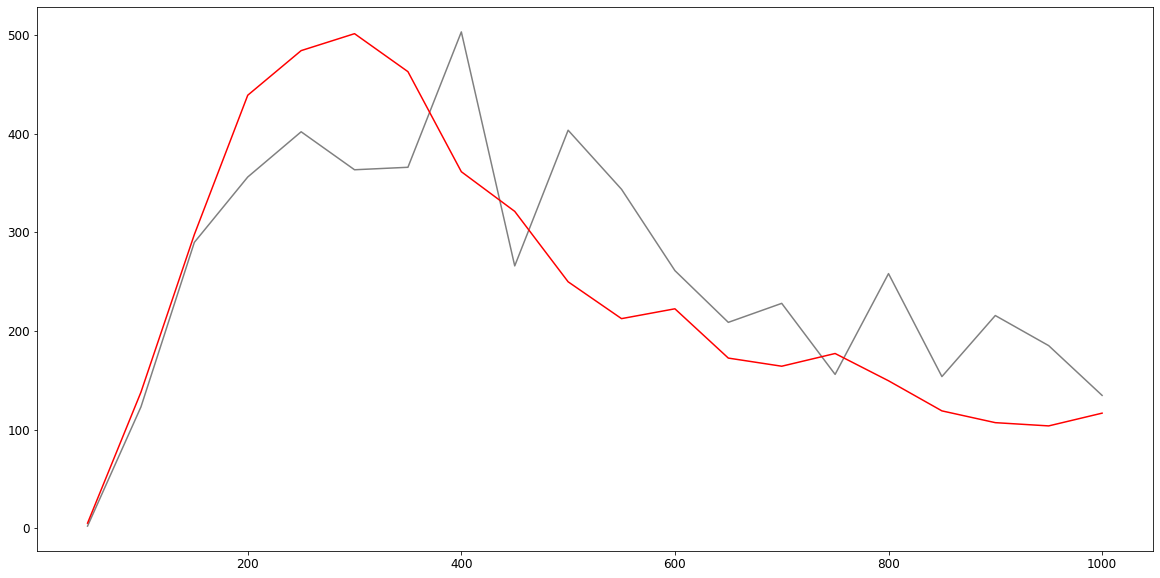

In [51]:
plt.plot(x1,y1,color='grey')
plt.plot(x2,y2,color='r')

In [35]:
filename3 = "sample_size_estimation/data/gemm_mnk_random_square2.txt"
data3 = get_data(filename3)

filename4 = "sample_size_estimation/data/gemm_mnk_random_square3.txt"
data4 = get_data(filename4)

filename5 = "sample_size_estimation/data/gemm_mnk_random_square4.txt"
data5 = get_data(filename5)

filename6 = "sample_size_estimation/data/gemm_mnk_random_square5.txt"
data6 = get_data(filename6)


In [36]:
x3,y3 = get_plot(data3)
x4,y4 = get_plot(data4)
x5,y5 = get_plot(data5)
x6,y6 = get_plot(data6)

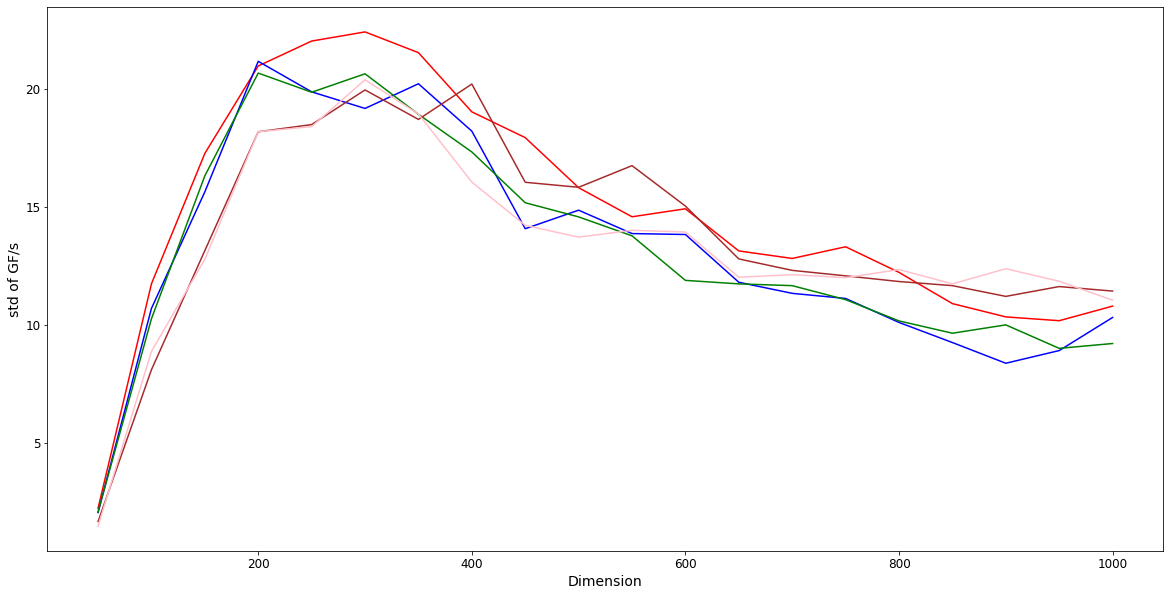

In [48]:
plt.ylabel("std of GF/s")
plt.xlabel("Dimension")
#plt.plot(x1,y1,color='grey')
plt.plot(x2,np.sqrt(y2),color='r')
plt.plot(x3,np.sqrt(y3),color='b')
plt.plot(x4,np.sqrt(y4),color='g')
plt.plot(x5,np.sqrt(y5),color='brown')
plt.plot(x6,np.sqrt(y6),color='pink')
#plt.plot(x3,(y3+y4+y5)/3.,color='grey')

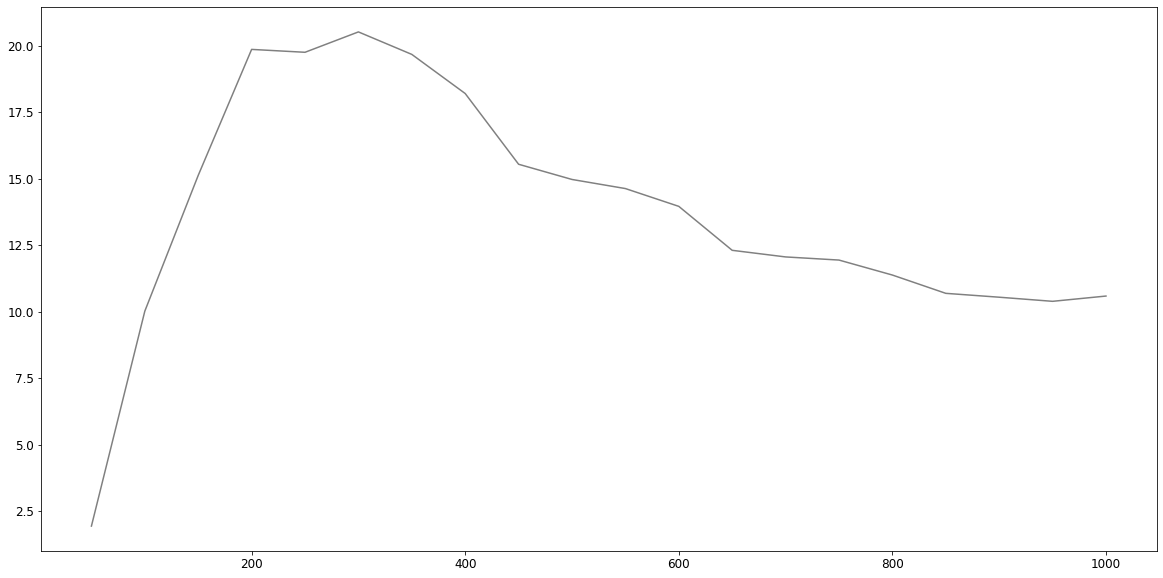

In [47]:
plt.plot(x3,np.sqrt((y2+y3+y4+y5+y6)/5.),color='grey')

### Deviations from minimum

In [52]:
def get_plot(data):
    y = []
    x = []
    for k,v in data.items():
        m,n,k = map(float,k.split())
        if m==n==k:
            #y.append(np.var(v))
            min_ = np.min(v)
            v_ = (np.array(v) - min_)/min_
            y.append(variance(v_))
            x.append(m)
    zipped = sorted(zip(x,y), key=lambda t: t[0])
    x = np.array(zipped)[:,0]
    y = np.array(zipped)[:,1]
    return (x,y)

In [53]:
x3,y3 = get_plot(data3)
x4,y4 = get_plot(data4)
x5,y5 = get_plot(data5)
x6,y6 = get_plot(data6)

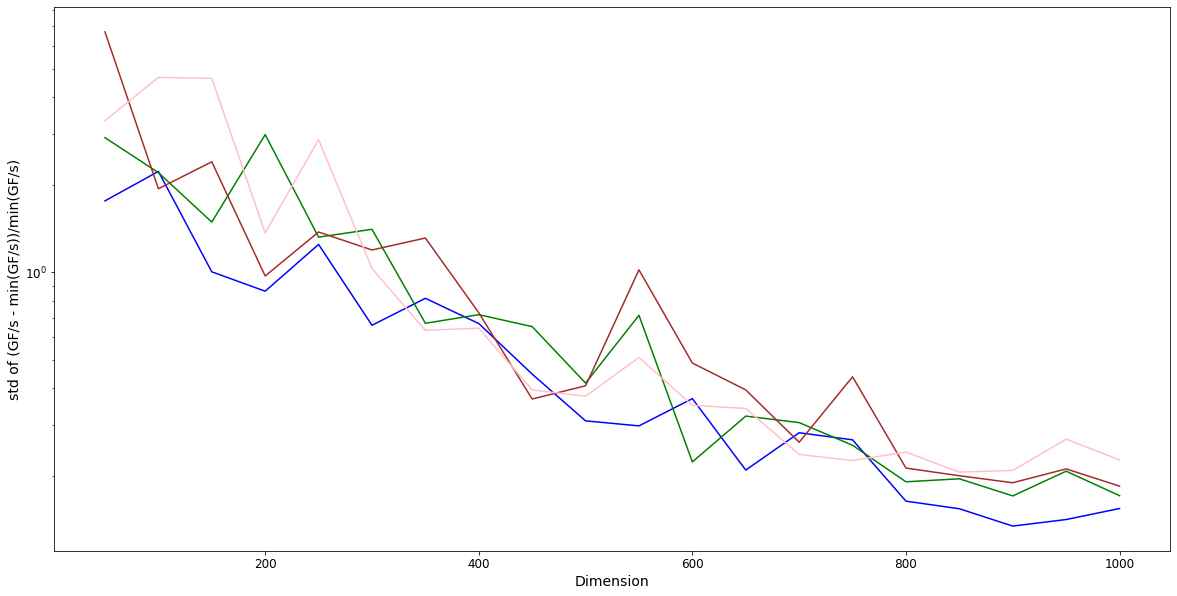

In [56]:
plt.ylabel("std of (GF/s - min(GF/s))/min(GF/s)")
plt.xlabel("Dimension")
plt.yscale('log')
plt.plot(x3,np.sqrt(y3),color='b')
plt.plot(x4,np.sqrt(y4),color='g')
plt.plot(x5,np.sqrt(y5),color='brown')
plt.plot(x6,np.sqrt(y6),color='pink')